In [1]:
import sys
sys.path.append('../')  
from KGA import GeneticAlgorithmKnapsack
from DATA import KnapsackGenerator
from TestFunctions import *
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class Knapsack:
    
    def __init__(self, val, wt, W):
        self.val = val
        self.wt = wt
        self.W = W
        self.n = len(val)
        self.K = [[0 for x in range(self.W + 1)] for x in range(self.n + 1)]
        self.convergence_values = []

    def knapSack(self):
        for i in range(self.n + 1):
            for w in range(self.W + 1):
                if i == 0 or w == 0:
                    self.K[i][w] = 0
                elif self.wt[i-1] <= w:
                    self.K[i][w] = max(self.val[i-1] + self.K[i-1][w-self.wt[i-1]], self.K[i-1][w])
                else:
                    self.K[i][w] = self.K[i-1][w]
        
        return self.K[self.n][self.W]
    

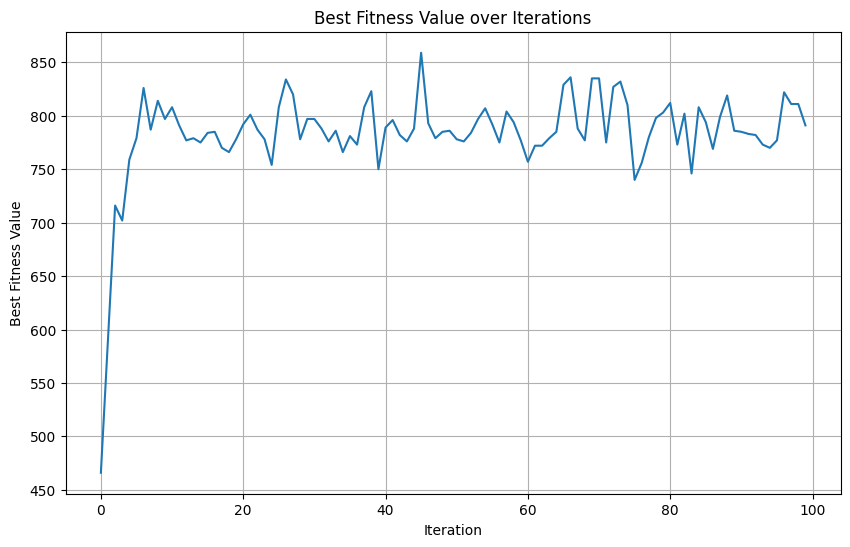

Best fitness value: 859.0
Best chromosome: [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
Weight result:  489.0


In [23]:
data = """
536
34 40
41 50
25 39
26 50
37 37
27 57
39 52
35 50
39 53
36 54
35 56
41 40
32 46
27 44
30 35
36 52
27 56
35 37
34 46
33 36
25 45
30 57
34 39
36 54
34 44
31 50
27 39
26 54
35 54
31 40
32 54
34 47
42 56
25 55
34 37
34 38
28 48
34 38
33 45
30 57
35 52
33 50
41 55
27 39
"""

lines = data.strip().split('\n')
knapsack_weight_limit = int(lines[0])
weights_of_items = []
costs_of_items = []

for line in lines[1:]:
    weight, cost = map(int, line.split())
    weights_of_items.append(weight)
    costs_of_items.append(cost)

weights_of_items = np.array(weights_of_items)
costs_of_items = np.array(costs_of_items)

ga = GeneticAlgorithmKnapsack(chromosome_size=len(weights_of_items), 
                               population_size=100, 
                               parent_count=74, 
                               probability_of_ones_in_a_new_chromosome=0.1, 
                               probability_of_crossover=0.8, 
                               probability_of_mutation=0.05, 
                               weights=weights_of_items, 
                               costs=costs_of_items, 
                               weight_limit=knapsack_weight_limit, 
                               epochs=100, filename="3t")

best_fitness_values, best_chromosomes = ga.fit()

best_fitness = max(best_fitness_values)
best_index = np.argmax(best_fitness_values)
best_chromosome = best_chromosomes[best_index]

print(f"Best fitness value: {best_fitness}")
print(f"Best chromosome: {best_chromosome}")
x = 0
for i in range(len(best_chromosome)):
    x += best_chromosome[i]*weights_of_items[i]

print("Weight result: ", x)


In [24]:
knapsack = Knapsack(weights_of_items, costs_of_items, knapsack_weight_limit)
max_value = knapsack.knapSack()
    
print(f"Weight result: ",  max_value)


Weight result:  468


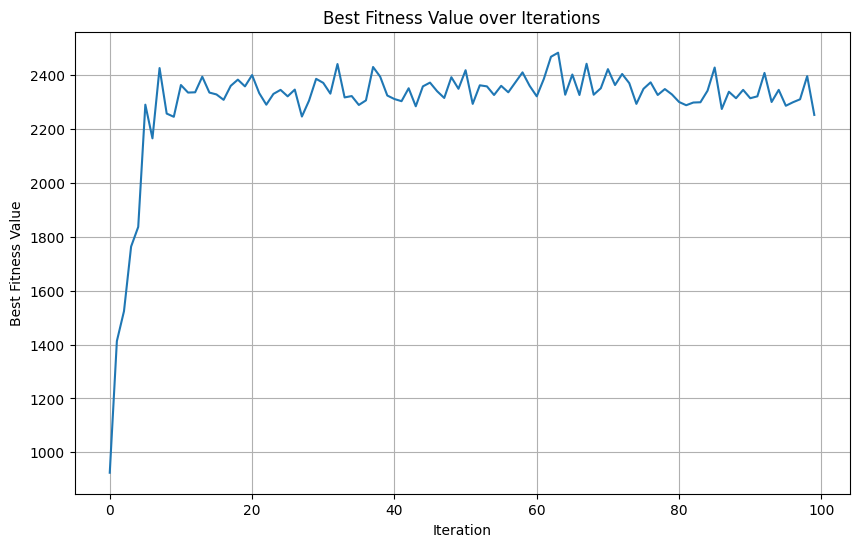

Best fitness value: 2484.0
Best chromosome: [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.]
Weight result:  1597.0


In [29]:
data = """
1681
26 54
30 56
29 52
36 48
35 41
42 57
40 46
39 48
32 42
26 54
31 41
40 45
32 48
42 43
28 44
30 58
32 49
40 51
38 39
26 50
28 56
26 55
31 48
27 55
28 46
38 50
28 46
29 43
27 42
36 57
42 52
29 37
40 39
33 51
25 44
31 37
26 36
29 48
31 57
33 53
35 49
27 50
39 56
29 52
37 49
42 44
40 39
28 45
39 39
28 42
33 50
28 51
32 45
42 55
27 55
29 42
41 40
42 55
41 39
33 45
35 39
28 38
30 43
38 50
40 51
27 41
39 40
35 42
42 36
25 53
33 39
37 51
30 50
33 40
36 55
34 58
38 48
33 47
25 44
41 36
33 56
37 47
42 40
30 39
40 51
34 45
25 52
42 42
26 52
33 39
39 51
42 37
35 58
32 37
40 41
30 44
35 58
30 45
36 37
39 36
38 50
33 42
28 35
30 41
28 55
41 41
32 48
34 47
37 37
38 42
41 39
39 41
32 47
25 50
42 50
33 48
31 55
39 51
31 44
42 41
"""

lines = data.strip().split('\n')
knapsack_weight_limit = int(lines[0])
weights_of_items = []
costs_of_items = []

for line in lines[1:]:
    weight, cost = map(int, line.split())
    weights_of_items.append(weight)
    costs_of_items.append(cost)

weights_of_items = np.array(weights_of_items)
costs_of_items = np.array(costs_of_items)

ga = GeneticAlgorithmKnapsack(chromosome_size=len(weights_of_items), 
                               population_size=100, 
                               parent_count=74, 
                               probability_of_ones_in_a_new_chromosome=0.1, 
                               probability_of_crossover=0.8, 
                               probability_of_mutation=0.05, 
                               weights=weights_of_items, 
                               costs=costs_of_items, 
                               weight_limit=knapsack_weight_limit, 
                               epochs=100, filename="13t")

best_fitness_values, best_chromosomes = ga.fit()

best_fitness = max(best_fitness_values)
best_index = np.argmax(best_fitness_values)
best_chromosome = best_chromosomes[best_index]

print(f"Best fitness value: {best_fitness}")
print(f"Best chromosome: {best_chromosome}")
x = 0
for i in range(len(best_chromosome)):
    x += best_chromosome[i]*weights_of_items[i]

print("Weight result: ", x)


In [26]:
knapsack = Knapsack(weights_of_items, costs_of_items, knapsack_weight_limit)
max_value = knapsack.knapSack()
    
print(f"Weight result: ",  max_value)

Weight result:  1566


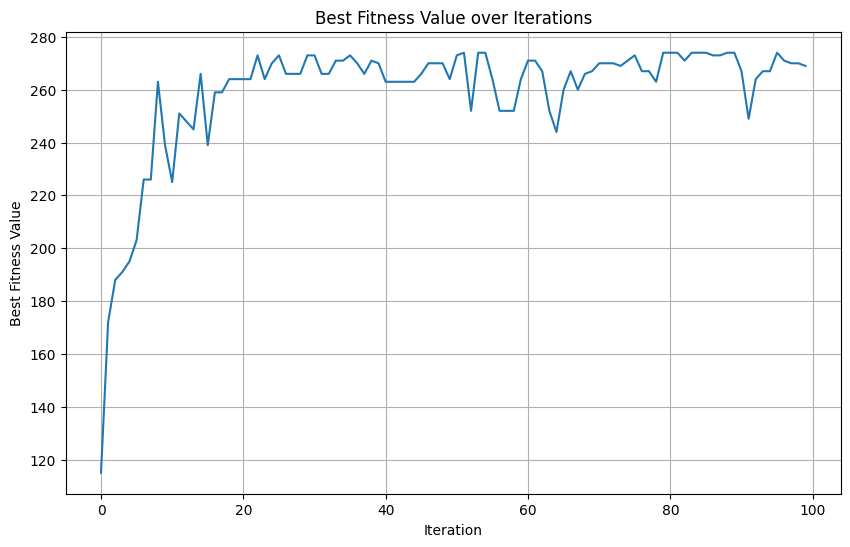

Best fitness value: 274.0
Best chromosome: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
Weight result:  80.0


In [37]:
knapsack_gen = KnapsackGenerator(num_items=10, capacity=100)
weights_of_items, costs_of_items = knapsack_gen.generate_data()
knapsack_weight_limit = 100


ga = GeneticAlgorithmKnapsack(chromosome_size=len(weights_of_items),
                                  population_size=100,
                                  parent_count=74,
                                  probability_of_ones_in_a_new_chromosome=0.1,
                                  probability_of_crossover=0.8,
                                  probability_of_mutation=0.05,
                                  weights=weights_of_items,
                                  costs=costs_of_items,
                                  weight_limit=knapsack_weight_limit,
                                  epochs=100,
                                  filename="data")
    
best_fitness_values, best_chromosomes = ga.fit()

best_fitness = max(best_fitness_values)
best_index = np.argmax(best_fitness_values)
best_chromosome = best_chromosomes[best_index]

print(f"Best fitness value: {best_fitness}")
print(f"Best chromosome: {best_chromosome}")
x = 0
for i in range(len(best_chromosome)):
    x += best_chromosome[i]*weights_of_items[i]

print("Weight result: ", x)


In [36]:
knapsack = Knapsack(weights_of_items, costs_of_items, knapsack_weight_limit)
max_value = knapsack.knapSack()
    
print(f"Weight result: ",  max_value)

Weight result:  54
